### Some plots and analysis of simulation data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Simulation Parameters

In [2]:
test_info = pd.read_csv("../data/stats/test_info.csv")
test_info

,test,workersCount,locationsCount,sampleSize,defaultMean,hbTimeout,stdDevCount,geoFactor,crashProb,delta,...,learningRate,regParam,numIterations,messageLossProb,stdevMargin,stdevFactor,pattern,distribution,averageDetectiontime,mistakeRate
0,epfd_test,100,20,nil,nil,2 seconds,30,1000.0,0.001,2 seconds,...,nil,nil,nil,0.75,nil,100.0,True,3,48049.147541,0.063333


## Prediction Evaluation of MLFD

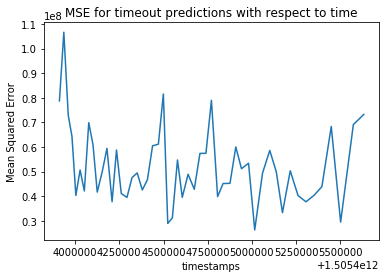

In [3]:
test_evaluations = pd.read_csv("../data/stats/testresults.csv")
time = test_evaluations["timestamp"].values
mse = test_evaluations["meanSquaredError"].values
plt.plot(time, mse)
plt.ylabel('Mean Squared Error')
plt.xlabel('timestamps')
plt.title('MSE for timeout predictions with respect to time')
plt.show()

## Analysis of number of suspected/crashed nodes with respect to time

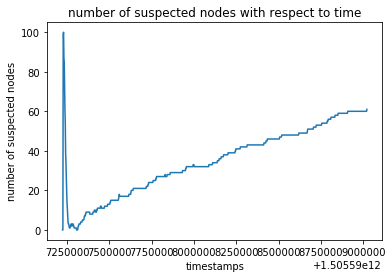

In [4]:
nodes_data = pd.read_csv('../data/stats/suspected_nodes.csv')
time = nodes_data["timestamp"].values
nodes = nodes_data["numberOfSuspectedNodes"].values
plt.plot(time, nodes)
plt.ylabel('number of suspected nodes')
plt.xlabel('timestamps')
plt.title('number of suspected nodes with respect to time')
plt.show()

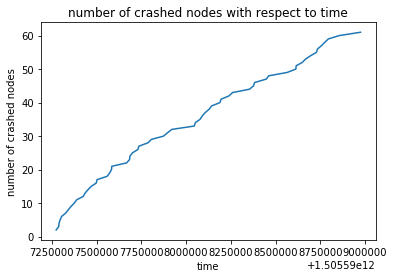

In [5]:
nodes_data = pd.read_csv('../data/stats/crashed_nodes.csv')
time = nodes_data["timestamp"].values
nodes = nodes_data["numberOfCrashedNodes"].values
plt.plot(time, nodes)
plt.ylabel('number of crashed nodes')
plt.xlabel('time')
plt.title('number of crashed nodes with respect to time')
plt.show()

## False suspicions with respect to time

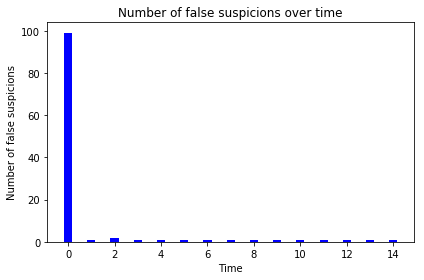

In [6]:
false_suspicions = pd.read_csv('../data/stats/node_false_suspicions.csv').groupby("timestamp").count()
l = len(false_suspicions.values)
width = 0.35
error_config = {'ecolor': '0.3'}
plt.bar(range(len(false_suspicions.values)), false_suspicions.values, width=width, color='b', error_kw=error_config)
plt.xlabel('Time')
plt.ylabel('Number of false suspicions')
plt.title('Number of false suspicions over time')
plt.tight_layout()

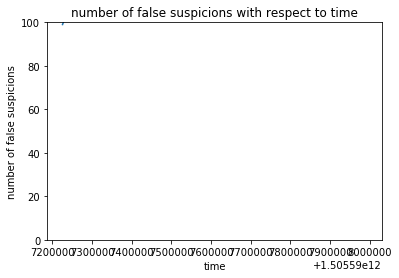

In [7]:
nodes_data = pd.read_csv('../data/stats/false_suspicion_count.csv')
time = nodes_data["timestamp"].values
nodes = nodes_data["numberOfFalseSuspicions"].values
plt.plot(time, nodes)
plt.ylim(0,100)
#plt.axis([3000, 80000, 0, 100])
plt.ylabel('number of false suspicions')
plt.xlabel('time')
plt.title('number of false suspicions with respect to time')
plt.show()

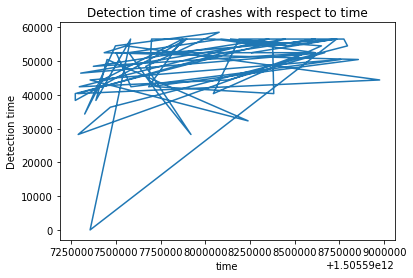

In [8]:
nodes_data = pd.read_csv('../data/stats/node_detection_times.csv').drop("node", 1)
time = nodes_data["crashTimestamp"].values
nodes = nodes_data["detectionTime"].values
plt.plot(time, nodes)
plt.ylabel('Detection time')
plt.xlabel('time')
plt.title('Detection time of crashes with respect to time')
plt.show()

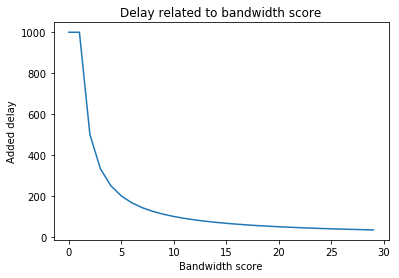

In [9]:
nodes_data = pd.read_csv('../data/stats/bandwidth_delay.csv')
bandwidth = nodes_data["bandwidth"].values
delay = nodes_data["delay"].values
plt.plot(bandwidth, delay)
plt.ylabel('Added delay')
plt.xlabel('Bandwidth score')
plt.title('Delay related to bandwidth score')
plt.show()

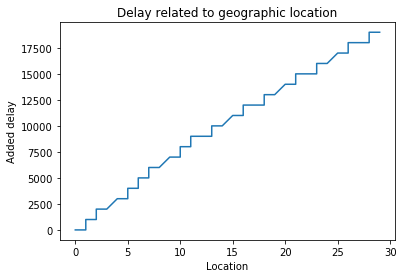

In [10]:
nodes_data = pd.read_csv('../data/stats/geo_delay.csv')
geo = nodes_data["location"].values
delay = nodes_data["delay"].values
plt.plot(bandwidth, delay)
plt.ylabel('Added delay')
plt.xlabel('Location')
plt.title('Delay related to geographic location')
plt.show()